In [4]:
#Import généraux

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import math
import collections


from sklearn.feature_selection import (
    SelectKBest, 
    chi2, 
    f_classif, 
    f_regression,
    r_regression,
    mutual_info_classif,
    mutual_info_regression
)

In [5]:
def load_raw_data(name):
    # Définir le chemin du dossier actuel du notebook
    current_dir = os.getcwd()
    
    # Accéder au répertoire parent
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = parent_dir  + "/data_to_use/raw"

    # Afficher le chemin du répertoire parent
    print("Répertoire des données brutes: \n", raw_data_dir)
    
    #Chargement d'un dataframe
    df=pd.read_csv(raw_data_dir + name, index_col=0)
        
    return df

def correlation_selection(df,
                          features, 
                          target,
                          threshold):
    
    correlations = df[features + [target]].corr()[target]
    selected_features = correlations[abs(correlations)>threshold]
    
    remove_target = selected_features.index[selected_features.index != target]
    return selected_features[remove_target]

In [7]:
#Chargement du DataFrame
df= load_raw_data("/train.csv")
#Séparation des variables et des cibles
features = df.iloc[:,:-7]
print("Features : ", features.columns)
targets = df.iloc[:,-7:]
print("Targets : ", targets.columns)

Répertoire des données brutes: 
 /run/media/fredericlagniez/Echanges_Linux_Windows/GitHUb/defauts_acier/defauts_plaques_acier/data_to_use/raw
Features :  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')
Targets :  Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')


In [ ]:
# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr = df_num.corr()

# Masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
    np.abs(corr),
    annot=False,
    cmap='coolwarm',
    vmin=0,
    vmax=1,
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": .5},
    square=True,
    ax=ax
)

# Configurer les étiquettes et le titre
plt.title("Matrice de corrélation", y=1.02, size=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
            

In [14]:
# MAtrice de corrélation

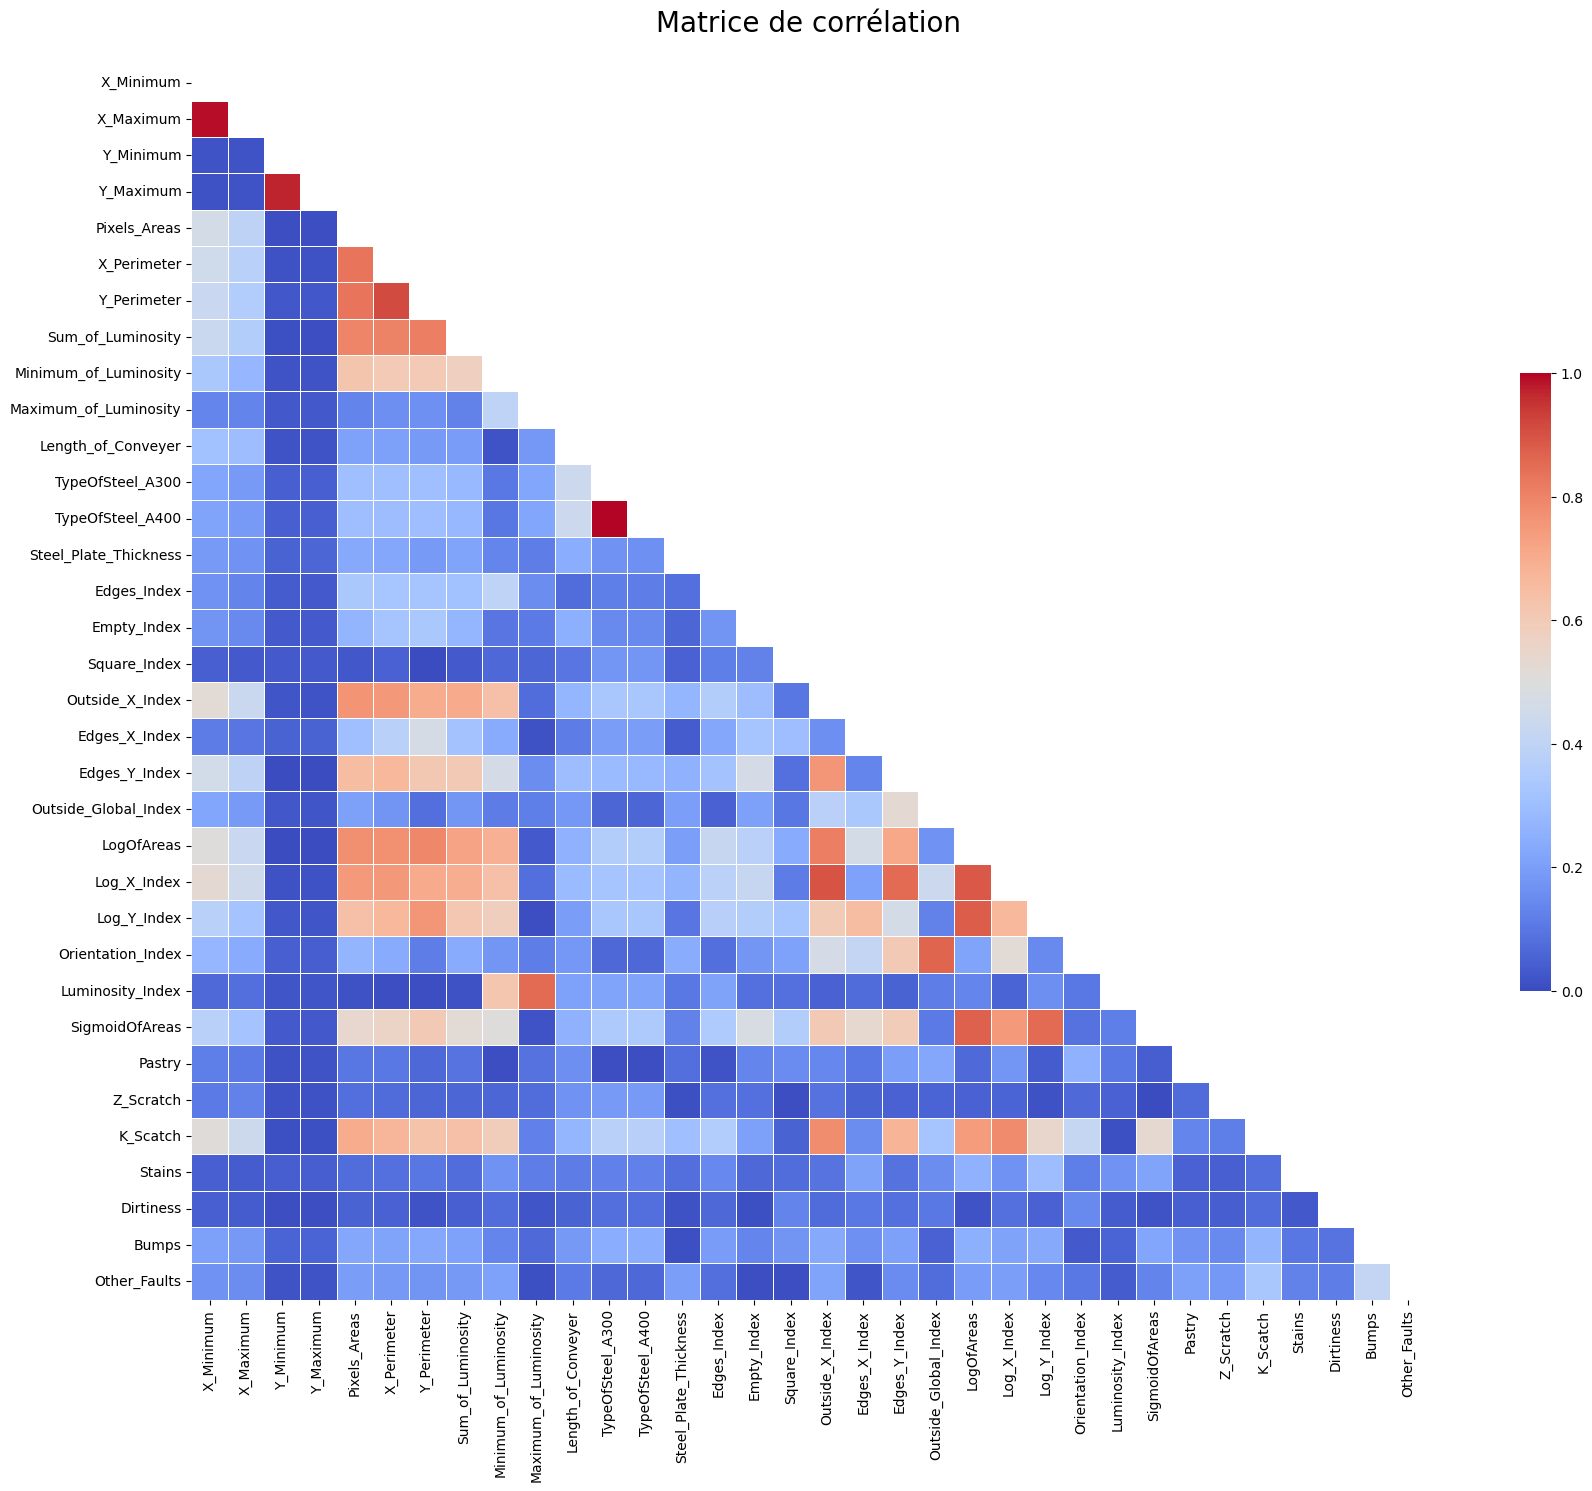

In [15]:
# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr = df_num.corr()

# Masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
    np.abs(corr),
    annot=False,
    cmap='coolwarm',
    vmin=0,
    vmax=1,
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": .5},
    square=True,
    ax=ax
)

# Configurer les étiquettes et le titre
plt.title("Matrice de corrélation", y=1.02, size=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
  # Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64'])

    # Vérifier que toutes les colonnes de la liste features sont présentes dans df_num
missing_columns = set(features) - set(df_num.columns)

concat = pd.concat([features,targets['Pastry']],axis=1)
concat.head()

correlations= concat.corr()['Pastry']

selected_features = correlations[abs(correlations) > 0.1]
print(selected_features.index)

remove_target = selected_features.index[selected_features.index != 'Pastry']

Index(['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter',
       'Length_of_Conveyer', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'Log_X_Index',
       'Orientation_Index', 'Luminosity_Index', 'Pastry'],
      dtype='object')


In [62]:
def correlation_selection(df,features,targets,target,correlation_threshold=0.1):
    """
    Sélectionne les caractéristiques numériques parmi les feature du dataframe df
    qui ont une correlation avec la cible (target) supérieure au seuil de selection
    (threshold).
    """
    #Concaténation features et target
    concat = pd.concat([features,targets[target]],axis=1)
    
    #Matrice de corrélation
    correlations= concat.corr()[target]

    selected_features = correlations[abs(correlations) > correlation_threshold]

    # Retirer la cible
    remove_target = selected_features.index[selected_features.index != target]

    return selected_features[remove_target].index


In [63]:
selected_features=correlation_selection(df=df,features=features,targets=targets,target='Pastry')
print(selected_features)

Index(['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter',
       'Length_of_Conveyer', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'Log_X_Index',
       'Orientation_Index', 'Luminosity_Index'],
      dtype='object')


In [89]:
def select_features_kbest(df,features,target, method, k=20):
    """
    Sélectionne à l'aide de la méthode KBest les k meilleures caractéristiques selon
    différentes méthodes statistiques, avec k=20 par défaut
    Retourne un dataframe contenant les k variables les plus pertinentes
    """    
    #Selectionner les k meilleures caractéristiques
    selector = SelectKBest(method, k=20)
    selected_features  = selector.fit_transform(features,df[target])
    
    #Transformation en DataFrame
    selected_features = pd.DataFrame(selected_features)
                        
    #Récupérer le nom des colonnes selectionnées par KBest
    selected_features.columns = selector.get_feature_names_out()
            
    print(f"les {k} features les plus pertinentes ont été sélectionnées.")           

    return df[selected_features.columns].columns

In [85]:
selector = SelectKBest(f_classif, k=20)
selected_features  = selector.fit_transform(features,targets['Pastry'])
    

In [88]:
targets.columns

Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [102]:
def select_features_kbest(df, features, target, method, k=20):
    """
    Sélectionne à l'aide de la méthode KBest les k meilleures caractéristiques selon
    différentes méthodes statistiques, avec k=20 par défaut
    Retourne un dataframe contenant les k variables les plus pertinentes
    """
    # Sélectionner les k meilleures caractéristiques
    selector = SelectKBest(method, k=k)
    selected_features = selector.fit_transform(features, df[target])

    # Transformation en DataFrame
    selected_features = pd.DataFrame(selected_features)

    # Renommer les colonnes en utilisant les noms des colonnes sélectionnées
    selected_features.columns = selector.get_feature_names_out()

    # Sélectionner les colonnes sélectionnées
    selected_columns = selected_features.columns

    print(f"Les {k} features les plus pertinentes ont été sélectionnées.")

    return df[selected_columns].columns


In [103]:
selected_features = select_features_kbest(df=df,features=features, target='Pastry', method=f_classif, k=20)
print(selected_features)

Les 20 features les plus pertinentes ont été sélectionnées.
Index(['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
       'Sum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
      dtype='object')


In [7]:
df=load_raw_data(name = "/train.csv")

correlation_threshold = 0.10

# Créer un defaultdict avec une valeur initiale de 0
dictionnaire = collections.defaultdict(int)

# Ajouter une entrée pour chaque clé de la liste avec une valeur de 0
for cle in features:
    dictionnaire[cle] = 0

for target in targets:
    # Supprimer la variable cible de la liste des variables
    features_without_target = [feature for feature in features if feature != target]

    selected = correlation_selection(df,
                                     features_without_target,
                                     target,
                                     threshold = 0.10)

    target_index = selected.index

    non_used = [x for x in features_without_target if x not in target_index]

    # Augmenter le compteur de 1 pour chaque variable non utilisée
    for cle in non_used:
        dictionnaire[cle] += 1

# Trier le dictionnaire par les valeurs
dictionnaire_trie = sorted(dictionnaire.items(), key=lambda x: x[1],reverse=True)

# Convertir la liste de tuples triés en dictionnaire
dictionnaire_trie = dict(dictionnaire_trie)

# Afficher le dictionnaire trié
print(dictionnaire_trie)


Répertoire des données brutes: 
 /media/frederic/Echanges_Linux_Windows/GitHUb/defauts_acier/defauts_plaques_acier/data_to_use/raw
{'Y_Minimum': 7, 'Y_Maximum': 7, 'Maximum_of_Luminosity': 5, 'Steel_Plate_Thickness': 5, 'Luminosity_Index': 5, 'Sum_of_Luminosity': 4, 'Edges_Index': 4, 'Empty_Index': 4, 'Square_Index': 4, 'Pixels_Areas': 3, 'X_Perimeter': 3, 'Y_Perimeter': 3, 'Minimum_of_Luminosity': 3, 'TypeOfSteel_A300': 3, 'TypeOfSteel_A400': 3, 'Outside_X_Index': 3, 'Edges_Y_Index': 3, 'Outside_Global_Index': 3, 'LogOfAreas': 3, 'Log_Y_Index': 3, 'SigmoidOfAreas': 3, 'X_Minimum': 2, 'X_Maximum': 2, 'Edges_X_Index': 2, 'Log_X_Index': 2, 'Orientation_Index': 2, 'Length_of_Conveyer': 1}


In [8]:
# Les variables lesmoins correlées aux cibles sont : ['Maximum_of_Luminosity': 5, 'Steel_Plate_Thickness': 5, 'Luminosity_Index': 5, 'Y_Minimum': 7, 'Y_Maximum': 7]

# Select K_best

In [10]:
# Critère f_classif 

# Créer un defaultdict avec une valeur initiale de 0
dico_f_classif = collections.defaultdict(int)

# Ajouter une entrée pour chaque clé de la liste avec une valeur de 0
for cle in features:
    dico_f_classif[cle] = 0
      
    
for target in targets:
    X = df.drop(target,axis =1)
    y = df[target]

    kb = SelectKBest(f_classif, k=25)

    X_new = kb.fit_transform(X,y)
    X_new = pd.DataFrame(X_new)
    X_new.columns = kb.get_feature_names_out()
        
    non_used = [x for x in features if x not in X_new.columns]

    # Augmenter le compteur de 1 pour chaque variable non utilisée
    for cle in non_used:
        dico_f_classif[cle] += 1
    
# Trier le dictionnaire par les valeurs
dico_f_classif_trie = sorted(dico_f_classif.items(), key=lambda x: x[1],reverse=True)
# Convertir la liste de tuples triés en dictionnaire
dico_f_classif_trie = dict(dico_f_classif_trie)
# Afficher le dictionnaire trié
print(dico_f_classif_trie)

{'Y_Minimum': 7, 'Y_Maximum': 7, 'Maximum_of_Luminosity': 4, 'Steel_Plate_Thickness': 3, 'Empty_Index': 3, 'Square_Index': 3, 'Luminosity_Index': 3, 'SigmoidOfAreas': 3, 'TypeOfSteel_A400': 2, 'Log_Y_Index': 2, 'X_Minimum': 1, 'X_Maximum': 1, 'Y_Perimeter': 1, 'Minimum_of_Luminosity': 1, 'TypeOfSteel_A300': 1, 'Edges_Index': 1, 'Edges_X_Index': 1, 'Outside_Global_Index': 1, 'LogOfAreas': 1, 'Orientation_Index': 1, 'Pixels_Areas': 0, 'X_Perimeter': 0, 'Sum_of_Luminosity': 0, 'Length_of_Conveyer': 0, 'Outside_X_Index': 0, 'Edges_Y_Index': 0, 'Log_X_Index': 0}


In [11]:
### On retrouve le même top four : Y_Minimum': 7, 'Y_Maximum': 7, 'Maximum_of_Luminosity': 4, 'Steel_Plate_Thickness'

In [12]:
# mutual_info_classif: Mutual information for a discrete target.
# Créer un defaultdict avec une valeur initiale de 0
dico_mutual_info = collections.defaultdict(int)

# Ajouter une entrée pour chaque clé de la liste avec une valeur de 0
for cle in features:
    dico_mutual_info [cle] = 0
    
   
    
from sklearn.feature_selection import (
    SelectKBest, 
    chi2, 
    f_classif, 
    f_regression,
    r_regression,
    mutual_info_classif,
    mutual_info_regression
)

for target in targets:
    X = df.drop(target,axis =1)
    y = df[target]

    kb = SelectKBest(mutual_info_classif, k=25)

    X_new = kb.fit_transform(X,y)
    X_new = pd.DataFrame(X_new)
    X_new.columns = kb.get_feature_names_out()
        
    non_used = [x for x in features if x not in X_new.columns]

    # Augmenter le compteur de 1 pour chaque variable non utilisée
    for cle in non_used:
        dico_mutual_info [cle] += 1
    
# Trier le dictionnaire par les valeurs
dico_mutual_info_trie = sorted(dico_mutual_info .items(), key=lambda x: x[1],reverse=True)
# Convertir la liste de tuples triés en dictionnaire
dico_mutual_info_trie = dict(dico_mutual_info_trie)
# Afficher le dictionnaire trié
print(dico_mutual_info_trie)


{'Maximum_of_Luminosity': 5, 'Y_Minimum': 4, 'TypeOfSteel_A300': 4, 'TypeOfSteel_A400': 4, 'Outside_Global_Index': 4, 'Y_Maximum': 3, 'Steel_Plate_Thickness': 1, 'Empty_Index': 1, 'Square_Index': 1, 'Log_Y_Index': 1, 'X_Minimum': 0, 'X_Maximum': 0, 'Pixels_Areas': 0, 'X_Perimeter': 0, 'Y_Perimeter': 0, 'Sum_of_Luminosity': 0, 'Minimum_of_Luminosity': 0, 'Length_of_Conveyer': 0, 'Edges_Index': 0, 'Outside_X_Index': 0, 'Edges_X_Index': 0, 'Edges_Y_Index': 0, 'LogOfAreas': 0, 'Log_X_Index': 0, 'Orientation_Index': 0, 'Luminosity_Index': 0, 'SigmoidOfAreas': 0}


In [ ]:
# Les variables lesmoins correlées aux cibles sont : ['Maximum_of_Luminosity': 5, 'Steel_Plate_Thickness': 5, 'Luminosity_Index': 5, 'Y_Minimum': 7, 'Y_Maximum': 7]

In [ ]:
# Dernirèe méthode  Utilisation de ExhaustiveFeatureSelector

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def split_data(df,target,test_size=0.2):
    """
        Fonction qui sépare les variables des cibles au sein d'un DataFrame
    Args:
        test_size (float, optional): _description_. Defaults to 0.2.
    """
    X = df.drop(targets,axis =1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    return X_train, X_test, y_train, y_test


for target in targets[:2]:
    
    X_train, X_test, y_train, y_test = split_data(df=df, target=target, test_size=0.2)

    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X_train, y_train)  # apply scaling on training data

    # Feature Selection
    efs1 = EFS(pipe,
                min_features=8,
                max_features=20,
                scoring='f1',
                print_progress=True,
                cv=5)

    efs1 = efs1.fit(X_train, y_train)

    print('Best accuracy score: %.2f' % efs1.best_score_)
    print('Best subset (indices):', efs1.best_idx_)
    print('Best subset (corresponding names):', efs1.best_feature_names_)


# Très long, en fonctionne pas ?

In [13]:
result = {}

for key in dictionnaire_trie:
    if key in dico_f_classif_trie:
        result[key] = dictionnaire_trie[key] + dico_f_classif_trie[key]
    else:
        result[key] = dictionnaire_trie[key]

for key in dico_f_classif_trie:
    if key not in dictionnaire_trie:
        result[key] = dico_f_classif_trie[key]

for key in dico_mutual_info_trie:
    if key in result:
        result[key] += dico_mutual_info_trie[key]
    else:
        result[key] = dico_mutual_info_trie[key]

print(result)

{'Y_Minimum': 18, 'Y_Maximum': 17, 'Maximum_of_Luminosity': 14, 'Steel_Plate_Thickness': 9, 'Luminosity_Index': 8, 'Sum_of_Luminosity': 4, 'Edges_Index': 5, 'Empty_Index': 8, 'Square_Index': 8, 'Pixels_Areas': 3, 'X_Perimeter': 3, 'Y_Perimeter': 4, 'Minimum_of_Luminosity': 4, 'TypeOfSteel_A300': 8, 'TypeOfSteel_A400': 9, 'Outside_X_Index': 3, 'Edges_Y_Index': 3, 'Outside_Global_Index': 8, 'LogOfAreas': 4, 'Log_Y_Index': 6, 'SigmoidOfAreas': 6, 'X_Minimum': 3, 'X_Maximum': 3, 'Edges_X_Index': 3, 'Log_X_Index': 2, 'Orientation_Index': 3, 'Length_of_Conveyer': 1}
